In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os
from collections import Counter


# Use PrettyTensor to simplify Neural Network construction.
import prettytensor as pt

import scipy.misc
from scipy import misc

from PIL import Image

In [7]:
print(tf.__version__)
print(pt.__version__)
import sys
print(sys.version)

1.0.0
0.7.4
3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [8]:
import format_input as fi

In [9]:
images_test, cls_test, labels_test, filenames_test = fi.load_images()

In [10]:
print("Size of:")
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Test-set:		203


In [11]:
print(cls_test)
cls_list = cls_test.tolist()
print(cls_list.count(1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
68


In [12]:
#######################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
# The height of an image
image_height = fi.image_height

# The width of an image
image_width = fi.image_width

# Length of an image when flattened to a 1-dim array.
img_size_flat = image_height * image_width

# Tuple with height and width of images used to reshape arrays.
img_shape = (image_height, image_width)

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = fi.num_channels

# Number of classes.
num_classes = fi.num_classes


In [13]:
def plot_images(images, cls_true, filenames, cls_pred=None):
    assert len(images) == len(cls_true) == len(filenames)
    
    # Create figure with 2x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    fig.set_size_inches(18.5, 10.5)
    
    files = []
    for f in filenames:
        file = f.split("/")
        file = file[-2] + "_" + file[-1]
        files.append(file)

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Plot image.
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            # Show true and predicted classes.
            if cls_pred is None:
                if i == 1 or i == 4 or i == 7:
                    xlabel = "True: {0}, Fn:\n\n\n{1}".format(cls_true[i], files[i])
                else:
                    xlabel = "True: {0}, \nFn: {1}".format(cls_true[i], files[i])
            else:
                if i == 1 or i == 4 or i == 7:
                    xlabel = "True: {0}, Pred: {1}, Fn:\n\n\n{2}".format(cls_true[i], cls_pred[i], files[i])
                else:
                    xlabel = "True: {0}, Pred: {1}, \nFn: {2}".format(cls_true[i], cls_pred[i], files[i])

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

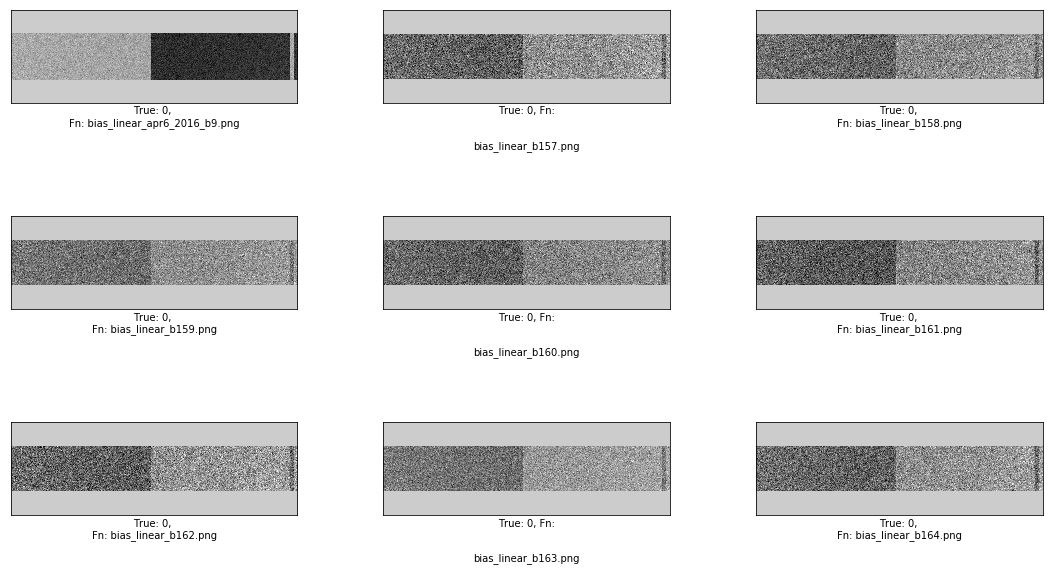

In [14]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Get the filenames for those images
filenames = filenames_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, filenames=filenames)

In [15]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [16]:
x_image = tf.reshape(x, [-1, image_height, image_width, num_channels])

In [17]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [18]:
y_true_cls = tf.argmax(y_true, axis=1)

In [19]:
x_pretty = pt.wrap(x_image)

In [20]:
        
with tf.Graph().as_default(), pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=36, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=64, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)
"""
with tf.Graph().as_default(), pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)
"""

"\nwith tf.Graph().as_default(), pt.defaults_scope(activation_fn=tf.nn.relu):\n    y_pred, loss = x_pretty.conv2d(kernel=5, depth=16, name='layer_conv1').max_pool(kernel=2, stride=2).conv2d(kernel=5, depth=36, name='layer_conv2').max_pool(kernel=2, stride=2).flatten().fully_connected(size=128, name='layer_fc1').softmax_classifier(num_classes=num_classes, labels=y_true)\n"

In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [22]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [23]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
session = tf.Session()

In [26]:
def init_variables():
    session.run(tf.global_variables_initializer())

In [27]:
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # For all the images in the test-set,
    # calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()

    # Classification accuracy and the number of correct classifications.
    acc, num_correct = cls_accuracy(correct)
    
    # Number of images being classified.
    num_images = len(correct)

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, num_correct, num_images))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [28]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = images_test[incorrect]
    
    # Get the filenames 
    filenames = []
    for i in images:
        index = np.where((images_test == i).all(axis=1))[0][0]
        filename = filenames_test[index]
        filenames.append(filename)
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the first 6 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                filenames=filenames[0:9],
                cls_pred=cls_pred[0:9])

In [29]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = cls_test
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [30]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 64

def predict_cls(images, labels, cls_true):
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        # Create a feed-dict with the images and labels
        # between index i and j.
        feed_dict = {x: images[i:j, :],
                     y_true: labels[i:j, :]}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [31]:
#def predict_cls_test():
#    return predict_cls(images = images_test,
#                       labels = labels_test,
#                       cls_true = cls_test)

def predict_cls_test():
    return predict_one_cls(images = images_test,
                       labels = labels_test,
                       cls_true = cls_test)

In [32]:
def predict_cls_validation():
    return predict_cls(images = images_val,
                       labels = labels_val,
                       cls_true = cls_val)

In [33]:
def cls_accuracy(correct):
    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / len(correct)

    return acc, correct_sum

In [34]:
def predict_one_image(images):
    
    # Reload the variables into the TensorFlow graph.
    #saver.restore(sess=session, save_path=save_path)
    
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted labels which
    # will be calculated in batches and filled into this array.
    pred_labels = np.zeros(shape=(num_images, num_classes),
                       dtype=np.float)
    
    # Create a feed-dict with the images between index i and j.
    feed_dict = {x: images[0:1, :]}

    # Calculate the predicted labels using TensorFlow.
    pred_labels[0:1] = session.run(y_pred, feed_dict=feed_dict)
    
    return pred_labels

### Load the Best model

In [35]:
def predict_one_image(images):
    
    # Reload the variables into the TensorFlow graph.
    #saver.restore(sess=session, save_path=save_path)
    
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted labels which
    # will be calculated in batches and filled into this array.
    pred_labels = np.zeros(shape=(num_images, num_classes),
                       dtype=np.float)
    
    # Create a feed-dict with the images between index i and j.
    feed_dict = {x: images[0:1, :]}

    # Calculate the predicted labels using TensorFlow.
    pred_labels[0:1] = session.run(y_pred, feed_dict=feed_dict)
    
    return pred_labels

In [36]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 1

def predict_one_cls(images, labels, cls_true):
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        test_image = images[i:j,:]
        # Create a feed-dict with the images and labels
        # between index i and j.
        # print(images[i:j, :].shape)
        # feed_dict = {x: images[i:j, :],
        #             y_true: labels[i:j, :]}

        # Calculate the predicted class using TensorFlow.
        prediction = get_predictions(test_image, i)
        cls_pred[i:j] = prediction

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [37]:
#init_variables()
#print_test_accuracy()

images/science/linear_b119.png
[3, 3, 1, 1]
images/science/linear_b120.png
[3, 3, 1, 1]
images/science/linear_b134.png
[3, 3, 1, 1]
images/science/linear_b135.png
[3, 3, 1, 1]
images/science/linear_b136.png
[3, 3, 1, 1]
images/standard/linear_r1024.png
[1, 2, 1, 2]
images/standard/linear_r1035.png
[1, 2, 1, 2]
Accuracy on Test-Set: 96.6% (197 / 204)
Example errors:


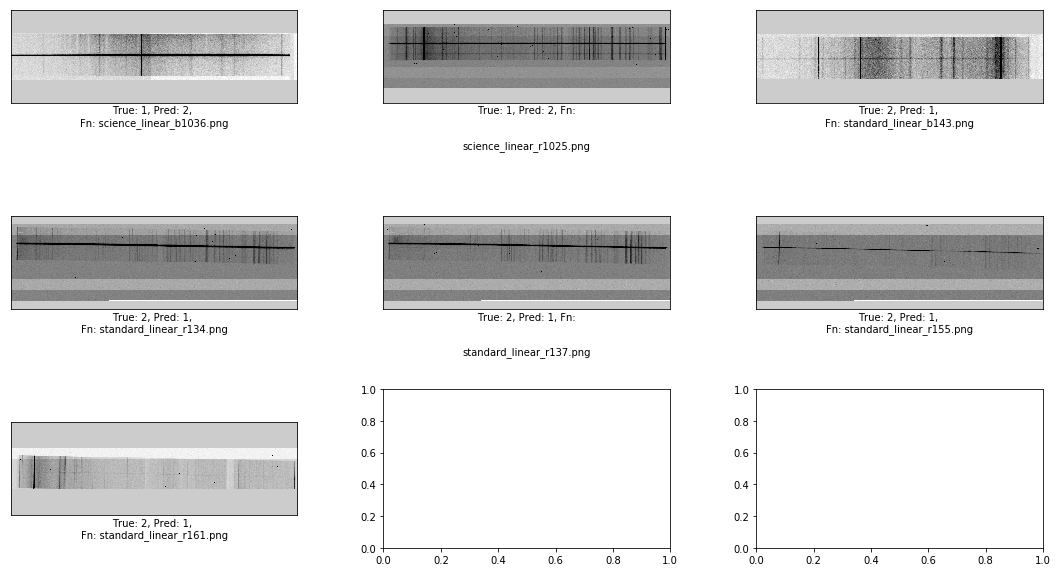

Confusion Matrix:
[[35  0  0  0  0]
 [ 0 67  2  0  0]
 [ 0  5  9  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 64]]


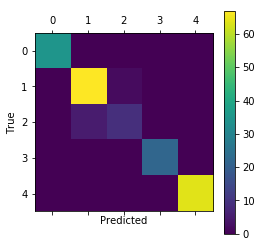

In [50]:
def get_predictions(test_image, i):
    filename = filenames_test[i]
    #print(filename)
    reshaped = test_image.reshape(img_shape)
    pil_image = Image.fromarray(reshaped)

    # Generate flipped images 
    pil_image.transpose(Image.FLIP_TOP_BOTTOM)
    image = np.array(pil_image)
    ver_image = np.array(pil_image.transpose(Image.FLIP_TOP_BOTTOM))
    hor_image = np.array(pil_image.transpose(Image.FLIP_LEFT_RIGHT))
    hor_ver_image = np.array(pil_image.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM))

    #  Add flipped images to an array
    im_array = []
    im_array.append(image.flatten())
    im_array.append(ver_image.flatten())
    im_array.append(hor_image.flatten())
    im_array.append(hor_ver_image.flatten())
    images_array = np.array(im_array)

    results = []
    results.append(np.argmax(predict_one_image(images_array[0:1,:])))
    results.append(np.argmax(predict_one_image(images_array[1:2,:])))
    results.append(np.argmax(predict_one_image(images_array[2:3,:])))
    results.append(np.argmax(predict_one_image(images_array[3:4,:])))
    resultsCounter = Counter(results)
    
    
    if len(set(results)) == 2 and results.count(1) == 2:
        print(filename)
        print(results)
        print("========")

    if results.count(2) >= 2:
        value = 2
    elif results.count(1) >= 2:
        value = 1
    else:
        value, _ = resultsCounter.most_common()[0]
    
    return value
    
init_variables()

saver = tf.train.Saver()

save_dir = 'checkpoints_final/'
save_path = os.path.join(save_dir, 'best_validation')

saver.restore(sess=session, save_path=save_path)

images_test, cls_test, labels_test, filenames_test = fi.load_images()
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

In [44]:
image_file = "images/standard/linear_r137.png"

pil_image = Image.open(image_file).convert("L")
image = np.array(pil_image)

ver_image = np.array(pil_image.transpose(Image.FLIP_TOP_BOTTOM))
hor_image = np.array(pil_image.transpose(Image.FLIP_LEFT_RIGHT))
hor_ver_image = np.array(pil_image.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM))

im_array = []
im_array.append(image.flatten())
im_array.append(ver_image.flatten())
im_array.append(hor_image.flatten())
im_array.append(hor_ver_image.flatten())
images_array = np.array(im_array)


test_image = images_array[0:1,:]
pred_labels = predict_one_image(test_image)
print(pred_labels)
print(np.argmax(pred_labels))
pred_labels = predict_one_image(images_array[1:2,:])
print(pred_labels)
print(np.argmax(pred_labels))
pred_labels = predict_one_image(images_array[2:3,:])
print(pred_labels)
print(np.argmax(pred_labels))
pred_labels = predict_one_image(images_array[3:4,:])
print(pred_labels)
print(np.argmax(pred_labels))

[[  1.90823014e-21   1.00000000e+00   0.00000000e+00   0.00000000e+00
    8.51283983e-36]]
1
[[ 0.  1.  0.  0.  0.]]
1
[[  4.62050756e-33   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]
1
[[  1.42191709e-28   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]
1
